In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import statsmodels.api as sm

In [132]:
caminho = "base_dummy.csv"
fr = pd.read_csv(caminho, sep=';', encoding='ISO-8859-1')

fr2 = pd.read_csv(caminho, sep=';', encoding='ISO-8859-1')

In [133]:
fr


,customer_answer,Flag Atraso Transporte2_x_tratada,Flag Atraso Fornecedor3_x_tratada,Flag Atraso Coleta4_x_tratada,Flag Atraso Cliente5_x_tratada,[FLAG]Cancelado_x_tratado,[FLAG]Recompra_ff_x_tratado,[FLAG]Erro prazo transporte validacao_x_tratada,[FLAG]Cross_x_tratado,[FLAG]Atraso_criacao_OC_x_tratado,...,[FLAG] Diarias_x_tratada,[FLAG] Atraso Coletas_x,[FLAG] Leves_x_tratada,[FLAG] Atraso CD_x,[FLAG] Recompra assistencia_x_tratada,[FLAG] Recompra Total_x_tratada,[FLAG] Atraso Cliente*_x,[FLAG] - Detrator_mais_entrega_x,[FLAG] - Categorias_detrator_x,[FLAG] Private_Label_x
0,"10,00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","0,00","0,00"
1,"10,00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","0,00","0,00"
2,"10,00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","1,00","0,00"
3,"10,00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","1,00","1,00"
4,"10,00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","1,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18853,"0,00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","1,00","1,00"
18854,"10,00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","0,00","0,00"
18855,"10,00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","0,00","0,00"
18856,"9,00",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"1,00","0,00","1,00","0,00"


In [134]:
fr_tr = fr.drop(columns = ['customer_answer'])

fr_tr.head()

,Flag Atraso Transporte2_x_tratada,Flag Atraso Fornecedor3_x_tratada,Flag Atraso Coleta4_x_tratada,Flag Atraso Cliente5_x_tratada,[FLAG]Cancelado_x_tratado,[FLAG]Recompra_ff_x_tratado,[FLAG]Erro prazo transporte validacao_x_tratada,[FLAG]Cross_x_tratado,[FLAG]Atraso_criacao_OC_x_tratado,[FLAG]Reprogramacao_OC_x_tratada,...,[FLAG] Diarias_x_tratada,[FLAG] Atraso Coletas_x,[FLAG] Leves_x_tratada,[FLAG] Atraso CD_x,[FLAG] Recompra assistencia_x_tratada,[FLAG] Recompra Total_x_tratada,[FLAG] Atraso Cliente*_x,[FLAG] - Detrator_mais_entrega_x,[FLAG] - Categorias_detrator_x,[FLAG] Private_Label_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","0,00","0,00"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","0,00","0,00"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","1,00","0,00"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","1,00","1,00"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"0,00",0.0,"0,00",0.0,0.0,"0,00","0,00","1,00","0,00"


<AxesSubplot: title={'center': 'Correlação de Spearman'}>

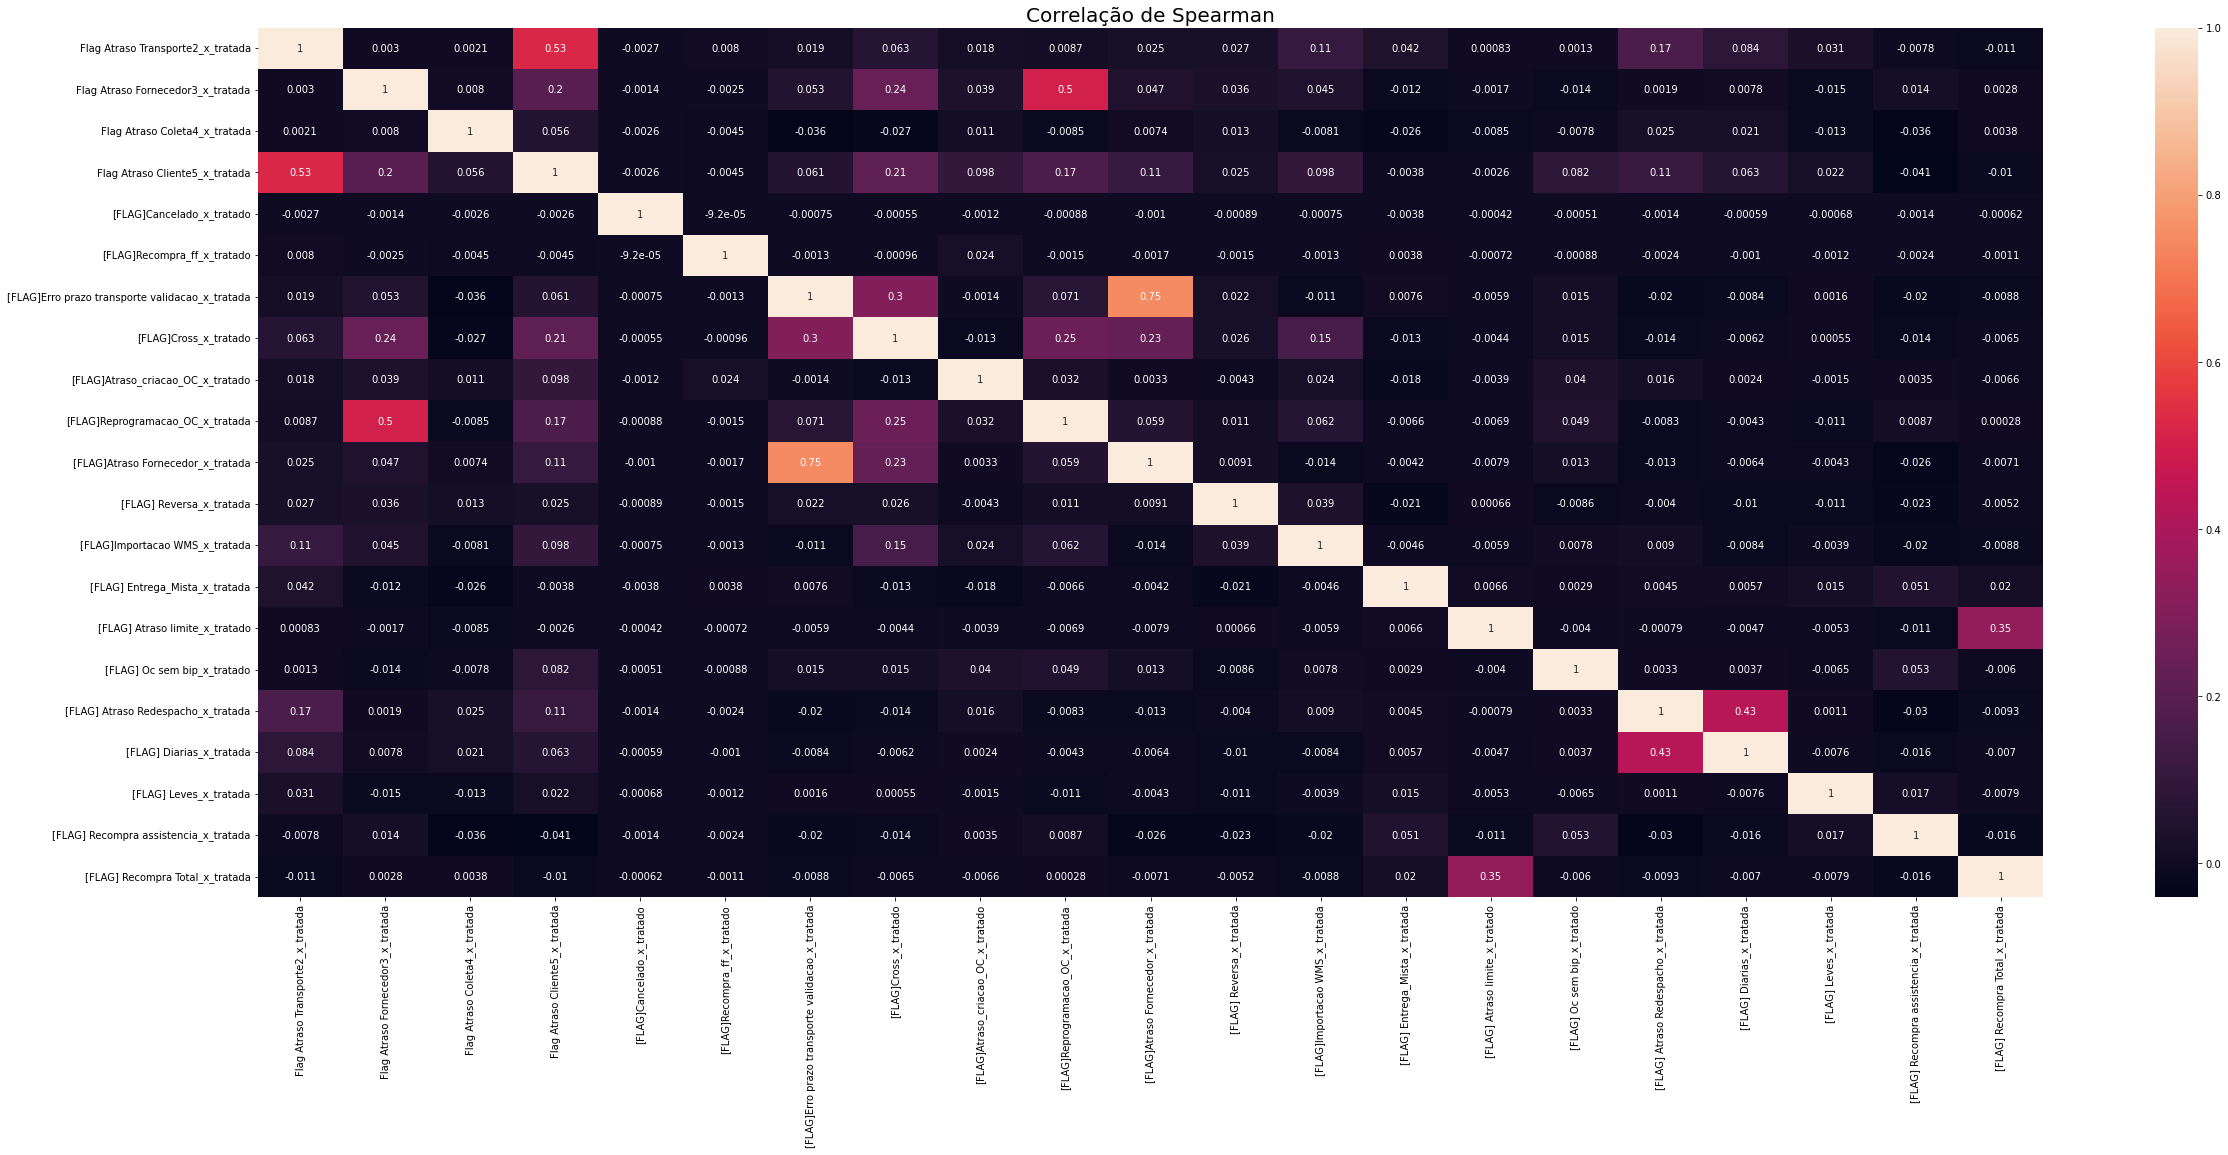

In [135]:
plt.figure(figsize=(40,16))
plt.title('Correlação de Spearman',size=20)
sb.heatmap(fr.corr('spearman'), annot = True)

In [141]:
fr_tr['[FLAG] Entregue_x'] = pd.to_numeric(fr_tr['[FLAG] Entregue_x'], errors='coerce')
fr_tr['[FLAG] Pratica_indevida_x'] = pd.to_numeric(fr_tr['[FLAG] Pratica_indevida_x'], errors='coerce')
fr_tr['[FLAG] Sac_pos_entrega_x'] = pd.to_numeric(fr_tr['[FLAG] Sac_pos_entrega_x'], errors='coerce')
fr_tr['[FLAG] PJ_x'] = pd.to_numeric(fr_tr['[FLAG] PJ_x'], errors='coerce')
fr_tr['[FLAG] Mais de uma entrega_x'] = pd.to_numeric(fr_tr['[FLAG] Mais de uma entrega_x'], errors='coerce')
fr_tr['[FLAG] Recompra_x'] = pd.to_numeric(fr_tr['[FLAG] Recompra_x'], errors='coerce')
fr_tr['[FLAG] Virada_Faturamento_x'] = pd.to_numeric(fr_tr['[FLAG] Virada_Faturamento_x'], errors='coerce')
fr_tr['FLAG - Infos_encontradas_x'] = pd.to_numeric(fr_tr['FLAG - Infos_encontradas_x'], errors='coerce')
fr_tr['[FLAG] Insucesso_x'] = pd.to_numeric(fr_tr['[FLAG] Insucesso_x'], errors='coerce')
fr_tr['[FLAG] End. N.Localizado/Ausente_x'] = pd.to_numeric(fr_tr['[FLAG] End. N.Localizado/Ausente_x'], errors='coerce')
fr_tr['[FLAG] Tempo Habil_x'] = pd.to_numeric(fr_tr['[FLAG] Tempo Habil_x'], errors='coerce')
fr_tr['[FLAG] Atraso Coletas_x'] = pd.to_numeric(fr_tr['[FLAG] Atraso Coletas_x'], errors='coerce')
fr_tr['[FLAG] Atraso CD_x'] = pd.to_numeric(fr_tr['[FLAG] Atraso CD_x'], errors='coerce')
fr_tr['[FLAG] Atraso Cliente*_x'] = pd.to_numeric(fr_tr['[FLAG] Atraso Cliente*_x'], errors='coerce')
fr_tr['[FLAG] - Detrator_mais_entrega_x'] = pd.to_numeric(fr_tr['[FLAG] - Detrator_mais_entrega_x'], errors='coerce')
fr_tr['[FLAG] - Categorias_detrator_x'] = pd.to_numeric(fr_tr['[FLAG] - Categorias_detrator_x'], errors='coerce')
fr_tr['[FLAG] Private_Label_x'] = pd.to_numeric(fr_tr['[FLAG] Private_Label_x'], errors='coerce')

fr2['customer_answer'] = pd.to_numeric(fr2['customer_answer'] , errors='coerce')







In [140]:
fr_trt = fr_tr.replace(np.nan, 0, regex=True)

print(fr_trt)


       Flag Atraso Transporte2_x_tratada  Flag Atraso Fornecedor3_x_tratada  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                0.0   
3                                    0.0                                0.0   
4                                    0.0                                0.0   
...                                  ...                                ...   
18853                                0.0                                0.0   
18854                                0.0                                0.0   
18855                                0.0                                0.0   
18856                                1.0                                0.0   
18857                                0.0                                0.0   

       Flag Atraso Coleta4_x_tratada  Flag Atraso C

In [ ]:
regressao = sm.OLS(fr2['customer_answer'],fr_tr).fit()
print(regressao.summary())
# fr_trt.to_csv('base_dummy.csv', sep=';', index=False)

MissingDataError: exog contains inf or nans

SyntaxError: invalid syntax (3081662196.py, line 1)